# AMS 380 Homework Assignment 2

In this homework assignment, you will delve into logistic regression to reinforce your understanding of key principles covered in the lectures. This assignment is designed to be hands-on, promoting the practical application of the concepts discussed. You are to fill in the empty code blocks to complete this assignment (necessary modifications may be needed, such as changing the data directory path depending on where you place the data).

Problem 1:

(1) Write your own code in the *prepare_X* function under **Data Preprocessing**

(2) Modify the code for *prepare_y* under **Data Preprocessing**.

(3) Implement *visualize_features* under **Main**

(4) Test your code in the "Data Preprocessing" section in the *main* function under **Main**.

Problem 2:

(1) Write your own code for *fit_GD*, *fit_SGD*, *_gradient*, *predict*, *score*, and *predict_proba* functions under **Logistic Regression**

(2) Implement *visualize_result* under **Main**

(3) Test your code in the "Logistic Regression Sigmoid Case" in the *main* function under **Main**

### Data Preprocessing

In [4]:
import numpy as np

"""This script implements the functions for reading data.
"""

def load_data(filename):
    """Load a given txt file.

    Args:
        filename: A string.

    Returns:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].

    """
    data= np.load(filename)
    x= data['x']
    y= data['y']
    return x, y

def train_valid_split(raw_data, labels, split_index):
    """Split the original training data into a new training dataset
    and a validation dataset.
    n_samples = n_train_samples + n_valid_samples

    Args:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].
        split_index: An integer.

    """
    return raw_data[:split_index], raw_data[split_index:], labels[:split_index], labels[split_index:]

def prepare_X(raw_X):
    """Extract features from raw_X as required.

    Args:
        raw_X: An array of shape [n_samples, 256]. ---> n_sample = 2300

    Returns:
        X: An array of shape [n_samples, n_features].
    """
    raw_image = raw_X.reshape((-1, 16, 16))

    # Feature 1: Measure of Symmetry
    ### YOUR CODE HERE

    flip_x = np.empty((len(raw_image), 16, 16))
    for i in range(len(raw_image)):
      flip_x[i] = np.fliplr(raw_image[i])


    F_symmetry = np.empty((len(raw_image), 1))
    for i in range(len(raw_image)):
      F_symmetry[i] = - abs( raw_image[i] - flip_x[i]).sum() / 256

    ### END YOUR CODE

    # Feature 2: Measure of Intensity
    ### YOUR CODE HERE

    F_intensity = np.empty((F_symmetry.shape))
    for i in range(len(raw_image)):
      F_intensity[i] = raw_image[i].sum() / 256

    ### END YOUR CODE

    # Feature 3: Bias Term. Always 1.
    ### YOUR CODE HERE

    Bias = np.ones((F_symmetry.shape))

    ### END YOUR CODE

    # Stack features together in the following order.
    # [Feature 3, Feature 1, Feature 2]
    ### YOUR CODE HERE

    X = np.column_stack((Bias, F_symmetry, F_intensity))

    ### END YOUR CODE
    return X

def prepare_y(raw_y):
    """
    Args:
        raw_y: An array of shape [n_samples,].

    Returns:
        y: An array of shape [n_samples,].
        idx:return idx for data label 1 and 2.
    """
    y = raw_y
    idx = np.where((raw_y==1) | (raw_y==2))
    y[np.where(raw_y==0)] = 0
    y[np.where(raw_y==1)] = 1
    y[np.where(raw_y==2)] = 2

    return y, idx

### Logistic Regression

In [5]:
import numpy as np
import sys

"""This script implements a two-class logistic regression model.
"""

class logistic_regression(object):

    def __init__(self, learning_rate, max_iter):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit_GD(self, X, y):
        """Train perceptron model on data (X,y) with Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        n_samples, n_features = X.shape

        ### YOUR CODE HERE

        self.assign_weights(np.zeros(n_features))
        sum = 0

        for t in range(self.max_iter):

          for i in range(n_samples):
            sum += self._gradient(X[i], y[i])

          g_t = sum / n_samples
          v_t = -g_t

          self.assign_weights(self.W + self.learning_rate * v_t)

        ### END YOUR CODE
        return self


    def fit_SGD(self, X, y):
        """Train perceptron model on data (X,y) with Stochastic Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        ### YOUR CODE HERE

        n_samples, n_features = X.shape
        self.assign_weights(np.zeros(n_features))

        for t in range(self.max_iter):
          idx = np.random.randint(0, n_samples)
          g = self._gradient(X[idx], y[idx])

          self.assign_weights(self.W - self.learning_rate * g)


        ### END YOUR CODE
        return self

    def _gradient(self, _x, _y):
        """Compute the gradient of cross-entropy with respect to self.W
        for one training sample (_x, _y). This function is used in fit_*.

        Args:
            _x: An array of shape [n_features,].
            _y: An integer. 1 or -1.

        Returns:
            _g: An array of shape [n_features,]. The gradient of
                cross-entropy with respect to self.W.
        """
        ### YOUR CODE HERE

        Z = np.exp(np.dot(_y * _x, self.W.T))
        _g = - (_y * _x) / (1 + Z)

        return _g

        ### END YOUR CODE

    def get_params(self):
        """Get parameters for this perceptron model.

        Returns:
            W: An array of shape [n_features,].
        """
        if self.W is None:
            print("Run fit first!")
            sys.exit(-1)
        return self.W

    def predict_proba(self, X):
        """Predict class probabilities for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds_proba: An array of shape [n_samples, 2].
                Only contains floats between [0,1].
        """
        ### YOUR CODE HERE

        preds_proba = np.empty((len(X), 2), dtype=float)

        for i in range(len(X)):
          s = np.dat(self.W.T, X[i])

          preds_proba[i][0] = 1 / (1+np.exp(-s)) # Class 1
          preds_proba[i][1] = 1 - preds_proba[i][0] # Class -1


        return preds_proba

        ### END YOUR CODE


    def predict(self, X):
        """Predict class labels for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds: An array of shape [n_samples,]. Only contains 1 or -1.
        """
        ### YOUR CODE HERE

        preds = np.empty((len(X),))

        for i in range(len(X)):
          s = np.dot(self.W.T, X[i])

          if s < 0:
            preds[i] = -1

          else:
            preds[i] = 1


        return preds

        ### END YOUR CODE

    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            score: An float. Mean accuracy of self.predict(X) wrt. y.
        """
        ### YOUR CODE HERE

        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)

        return round(accuracy, 4)

        ### END YOUR CODE

    def assign_weights(self, weights):
        self.W = weights
        return self


### Main

-----------------------------
Question 1
Generate feature and save figure
-----------------------------


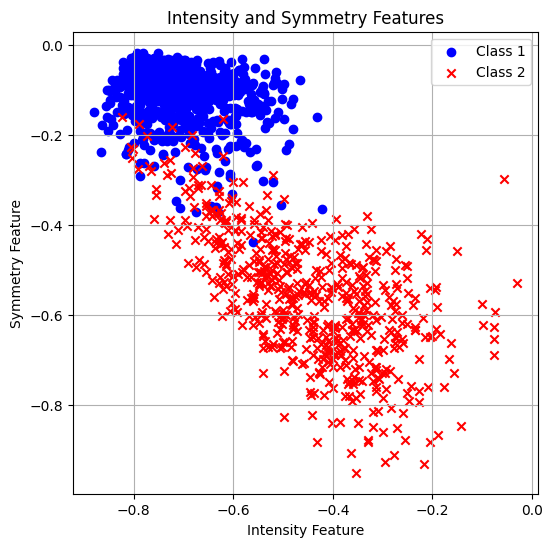

-----------------------------
Question 2(a,b,c)
Check GD, SGD
-----------------------------
[ -0.31645236  63.85918405 -29.36941439]
0.9681
[ 0.04578995  3.80079212 -2.28193392]
0.9548
-----------------------------
Question 2(d)
Grid search hyper-parameters
-----------------------------
[ 0.33954923  0.93807259 -0.75693177]
0.6844
[ 0.05506792  1.76141394 -1.10651844]
0.9415
[ 0.62131371  1.48645917 -1.37254001]
0.6333
[ 0.26255927  3.12809411 -1.75023355]
0.9378
[ 0.03994325  3.80995329 -2.11050465]
0.963
[ 0.42605957  5.34381859 -2.91734842]
0.9407

The best combination based on the validation set:
[ 0.03994325  3.80995329 -2.11050465] 
With accuracy: 0.963
With learning rate: 0.5      max iter: 100
-----------------------------
Question 2(e)
Visualize the best model and save figure
-----------------------------
[ 0.13871035  3.74595468 -1.78483025]
0.9652


<Figure size 640x480 with 0 Axes>

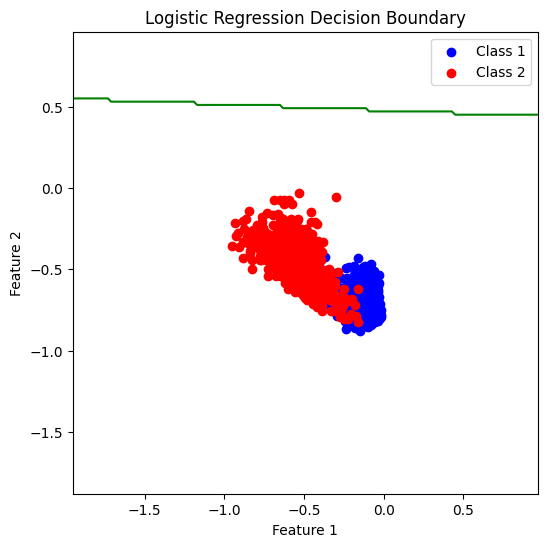

-----------------------------
Question 2(f)
Use best model to do testing
-----------------------------


<Figure size 640x480 with 0 Axes>

In [6]:
import os
import matplotlib.pyplot as plt

data_dir = ""
train_filename = "training.npz"
test_filename = "test.npz"

def visualize_features(X, y):
    '''This function is used to plot a 2-D scatter plot of training features.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.

    Returns:
        No return. Save the plot to 'train_features.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE

    class1_x = X[y == 1]
    class1_y = y[y == 1]
    class2_x = X[y == -1]
    class2_y = y[y == -1]

    plt.figure(figsize=(6, 6))
    # plt.scatter(x, y, c=None, marker=None)
    plt.scatter(class1_x[:, 1], class1_x[:, 0], c='b', marker='o', label='Class 1')
    plt.scatter(class2_x[:, 1], class2_x[:, 0], c='r', marker='x', label='Class 2')
    plt.xlabel("Intensity Feature")
    plt.ylabel("Symmetry Feature")
    plt.title("Intensity and Symmetry Features")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('train_features.png')

    ### END YOUR CODE

def visualize_result(X, y, W):
    '''This function is used to plot the sigmoid model after training.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.
        W: An array of shape [n_features,].

    Returns:
        No return. Save the plot to 'train_result_sigmoid.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE

    plt.figure(figsize=(6, 6))


    # Plot data points from class 1 and class 2 separately
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Class 2')

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Z = np.dot(np.c_[xx1.ravel(), xx2.ravel()], W[:-1]) + W[-1]
    Z = np.sign(Z).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, levels=[0], colors='green', linestyles='-')


    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')

    plt.legend()
    plt.show()
    plt.savefig('train_result_sigmoid.png')


    ### END YOUR CODE


def main():
    # ------------Data Preprocessing------------
    # Read data for training.

    raw_data, labels = load_data(os.path.join(data_dir, train_filename))
    raw_train, raw_valid, label_train, label_valid = train_valid_split(raw_data, labels, 2300)

    ##### Preprocess raw data to extract features
    train_X_all = prepare_X(raw_train)
    valid_X_all = prepare_X(raw_valid)
    ##### Preprocess labels for all data to 0,1,2 and return the idx for data from '1' and '2' class.
    train_y_all, train_idx = prepare_y(label_train)
    valid_y_all, val_idx = prepare_y(label_valid)

    ####### For binary case, only use data from '1' and '2'
    train_X = train_X_all[train_idx]
    train_y = train_y_all[train_idx]
    ####### Only use the first 1350 data examples for binary training.
    train_X = train_X[0:1350]
    train_y = train_y[0:1350]
    valid_X = valid_X_all[val_idx]
    valid_y = valid_y_all[val_idx]
    ####### set lables to  1 and -1. Here convert label '2' to '-1' which means we treat data '1' as postitive class.
    train_y[np.where(train_y==2)] = -1
    valid_y[np.where(valid_y==2)] = -1
    data_shape= train_y.shape[0]

    ## Visualize training data.
    print('-----------------------------')
    print('Question 1')
    print('Generate feature and save figure')
    print('-----------------------------')
    visualize_features(train_X[:, 1:3], train_y)


   # ------------Logistic Regression Sigmoid Case------------

   ##### Check GD, SGD
    print('-----------------------------')
    print('Question 2(a,b,c)')
    print('Check GD, SGD')
    print('-----------------------------')
    logisticR_classifier = logistic_regression(learning_rate=0.5, max_iter=100)

    logisticR_classifier.fit_GD(train_X, train_y)
    print(logisticR_classifier.get_params())
    print(logisticR_classifier.score(train_X, train_y))

    logisticR_classifier.fit_SGD(train_X, train_y)
    print(logisticR_classifier.get_params())
    print(logisticR_classifier.score(train_X, train_y))


    # Explore different hyper-parameters.
    print('-----------------------------')
    print('Question 2(d)')
    print('Grid search hyper-parameters')
    print('-----------------------------')
    learning_rate = [0.1, 0.2, 0.5]
    max_iter = [100, 200]

    ### YOUR CODE HERE

    parameter = []
    accuracy = []
    lr_with_iter = []

    for lr in learning_rate:
      for m in max_iter:
        test = logistic_regression(learning_rate=lr, max_iter=m)

        test.fit_SGD(train_X, train_y)
        print(test.get_params())
        print(test.score(train_X, train_y))

        parameter.append(test.get_params())
        accuracy.append(test.score(train_X, train_y))
        lr_with_iter.append(("learning rate: ", lr, "max_iter: ", m))

    print("\nThe best combination based on the validation set:")

    best_index = accuracy.index(max(accuracy))
    print(parameter[best_index], '\nWith accuracy:', max(accuracy))

    best_lr = lr_with_iter[best_index][1]
    best_max_iter = lr_with_iter[best_index][3]
    print("With learning rate:", best_lr, "     max iter:", best_max_iter)


    ### END YOUR CODE

    # Visualize the your 'best' model after training.
    # visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())
    print('-----------------------------')
    print('Question 2(e)')
    print('Visualize the best model and save figure')
    print('-----------------------------')

    ### YOUR CODE HERE

    best_logisticR = logistic_regression(learning_rate=best_lr, max_iter=best_max_iter)
    best_logisticR.fit_SGD(train_X, train_y)
    print(best_logisticR.get_params())
    print(best_logisticR.score(train_X, train_y))

    visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())


    ### END YOUR CODE

    # Use the 'best' model above to do testing. Note that the test data should be loaded and processed in the same way as the training data.
    print('-----------------------------')
    print('Question 2(f)')
    print('Use best model to do testing')
    print('-----------------------------')
    '''Five steps below:
    1. Preprocess raw data to extract features
    2. Preprocess labels for all data to 0,1,2 and return the idx for data from '1' and '2' class.
    3. For binary case, only use data from '1' and '2'.
    4. Set lables to  1 and -1. Here convert label '2' to '-1' which means we treat data '1' as postitive class.
    5. Use all training data to train model again with best hyper-parameters
    '''
    ### YOUR CODE HERE







    ### END YOUR CODE



    # ------------End------------


if __name__ == '__main__':
    main()

